<a href="https://colab.research.google.com/github/DGkurnia/discuss1/blob/main/airquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Derfansyah Guswiranata Kurnia]
- **Email:** [weerakurnia@gmail.com]
- **ID Dicoding:** [dgkurnia]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana kondisi suhu di dua belas kota dari tahun 2013 samapai 2017 ?
- Pertanyaan 2 : Bagaimana pemeriksaan ukuran partikuler (untuk PM 2.5 dan PM 10) di dua belas kota dari tahun 2013 sampai 2017 ?.
- Pertanyaan 3 : Bagaimana pemeriksaan kadar sulfur dioksida (SO2), kadar nitrogen monoksida (NO) dan karbon monoksida (CO) di dua belas kota dari tahun 2013 sampai 2017 ?.
- Pertanyaan 4 : Bagaimana pemeriksaan kondisi gas ozone (O3) dari tahun 2013 sampai 2017 ?.

In [1]:
from google.colab import drive
drive.mount('/content/drive') #dasar instalasi file dari Google Drive

Mounted at /content/drive


## Impor Semua Paket/Library yang Digunakan
Kumpulan perpustakaan Python yang dipakai untuk proyek:


In [2]:
#persiapan perpustakaan dan file untuk pembersihan
import numpy as np
import pandas as pd #dasar pengelolaan data
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime # dasar pengelolaan data berbasis waktu
from scipy.interpolate import interp1d #interpolasi linear
from scipy.stats import skew #pemeriksaan kecendrungan

## Data Wrangling
Pada tahap ini, jumlah dataframe yang akan dianalisis adalah 12 unit

In [3]:

#persiapan insersi data
dfaotizhongxin = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/aotizhongxin.csv')
dfchangping = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/changping.csv')
dfdingling = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/dingling.csv')
dfdongsi = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/dongsi.csv')
dfguanyuan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/guanyuan.csv')
dfgucheng = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/gucheng.csv')
dfhuairou = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/huairo.csv')
dfnonzhanguan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/nonzhanguan.csv')
dfshunyi = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/shunyi.csv')
dftiantan = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/tiantan.csv')
dfwanliu = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/wanliu.csv')
dfwanshouxigong = pd.read_csv('/content/drive/MyDrive/csv-files/aqins/wanshouxigong.csv')
"""
Kota awal adalah Aotizhungxin dan kota akhir adalah Wanshouxigong
"""

'\nKota awal adalah Aotizhungxin dan kota akhir adalah Wanshouxigong\n'

### Tahap Pengumpulan (Gathering Data)
#### rincian dari pengumpulan data : ada 12 dataset kota yang terdiri dari
* Nomor
* Tahun
* Bulan
* Jam
* kadar partikulat (PM 2.5 dan 10)
* kadar senyawa SO2, NO, CO, dan O3 (dalam mikrogram/ m^3)
* tempratur (dalam celsius)
* Nilai tekanan (dalam hektoPascal)
* arah angin dan kecepatan angin
-- Nilai Tahun, bulan dan jam bisa diubah menjadi tanggal.


### Assessing Data
#### Hal yang diperhatikan dalam pemeriksaan kadar udara
- Total data duplikat
-- Aotizhongxin : tidak ada
-- Changpin : Tidak ada
- Jumlah data hilang di masing-masing unit
-- Kota Aotizhingxin : 925 data di PM2.5, 718 di PM 10. Tiga kolom memiliki data kosong di atas 500
-- Kota Changpin : banyak data hilang berada di pemeriksaan empat gas tersebut
--- Kota lain memiliki kecendrungan untuk memiliki data kosong di kondisi tersebut
#### Hal unik lain
Forrmat tanggal yang salah (awalnya tahun, bulan, hari, dan jam) yang dipisah

In [4]:
"""
pemeriksaan data dari data kurang lengkap untuk enam kota pertama :
(kota Aotizhongxin sampai Huairo)
"""

#dfaotizhongxin.info()
#dfaotizhongxin.isnull().sum()
#dfaotizhongxin.duplicated().sum() # kota Aotizhongxin
#dfchangping.info()
#dfchangping.isnull().sum()
#dfchangping.duplicated().sum() # Changping
#dfdongsi.isnull().sum()
#dfdongsi.duplicated().sum()
#dfdingling.info()
#dfdingling.isnull().sum()
#dfdingling.duplicated().sum() #Dingling


'\npemeriksaan data dari data kurang lengkap untuk enam kota pertama :\n(kota Aotizhongxin sampai Huairo)\n'

In [5]:
"""
pemeriksaan data dari data kurang lengkap untuk enam kota terakhir :
(kota Nonzhanguan sampai Wanshouxigong)
"""

#dfnonzhanguan.info()
#dfnonzhanguan.isnull().sum()
#dfnonzhanguan.duplicated().sum() #Nonzhanguan
#dfwanshouxigong.info()


'\npemeriksaan data dari data kurang lengkap untuk enam kota terakhir :\n(kota Nonzhanguan sampai Wanshouxigong)\n'

### Cleaning Data
#### Pengantar : Data ini bisa dimanfaatkan untuk pengaturan sehingga proses yang sesuai untuk pembersihan data adalah interpolasi kolom indikator yang berangka demi menjaga aspek kolom yang hilang. Di sisilain, pengisian data dengan modus berlaku untuk kolom non integer
Tahapan pembersihan data
(hal ini berlaku untuk 12 kota)
1.   Pengubahan format waktu dan menghapus format salah (Tahun, bulan, angka, dan jam)
2. Proses interpolasi untuk kolom hilang di indikator yang dibutuhkan
3. Pengisian nilai non numerik yang hilang




In [6]:
#pembersihan bagian pertama (pengubahan format data waktu) untuk dua belas kota
dfaotizhongxin['datetime'] = dfaotizhongxin[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfchangping['datetime'] = dfchangping[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfdingling['datetime'] = dfdingling[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfdongsi['datetime'] = dfdongsi[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfguanyuan['datetime'] = dfguanyuan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfgucheng['datetime'] = dfgucheng[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfhuairou['datetime'] = dfhuairou[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfnonzhanguan['datetime'] = dfnonzhanguan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfshunyi['datetime'] = dfshunyi[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dftiantan['datetime'] = dftiantan[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfwanliu['datetime'] = dfwanliu[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)
dfwanshouxigong['datetime'] = dfwanshouxigong[['year', 'month', 'day', 'hour']].apply(lambda x: datetime(*x), axis=1)

#penghapusan kolom 'tahun' dan tiga indeks lain untuk 12 kota (dari Aotizhongxin sampai Wanshouxigong)

dfaotizhongxin.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfchangping.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfdingling.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfdongsi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfguanyuan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfgucheng.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfhuairou.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfnonzhanguan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfshunyi.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dftiantan.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfwanliu.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
dfwanshouxigong.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

#pemeriksaan kolom untuk memeriksa jika kota sudah memiliki indikator waktu
#dfaotizhongxin.head(10) #Kota Aotizhongxin
#dfchangping.head(10)# Kota Changping
#dfdingling.head(10)# Kota Dingling
#dfdongsi.head(10)# Kota Dongsi
#dfguanyuan.head(10)# Kota Guanyuan
#dfgucheng.head(10)# Kota Gucheng
#dfhuairou.head(10)# Kota Huairou
#dfnonzhanguan.head(10) #kota Nanzhanguan
#dfshunyi.head(10) #kota sunyi
#dftiantan.head(10) #Kota Tiantan
#dfwanliu.head(10) #Kota Wanliu
#dfwanshouxigong.head(10) #Kota Wanshouxigong
#hasil ini untuk memeriksa penghapusan kolom waktu

In [7]:
"""
#bagian dua (proses interpolasi kolom)
Tahap pertama pemeriksaan data yang hilang untuk masing-masing kota dari Aotizhongxing sampai Wanshouxigong
"""
# pemeriksan total kolom kosong untuk interpolasi
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Aotizhongxing)
#dfchangping.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Changping)
#dfdingling.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Dingling)
#dfdongsi.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Dongsi)
#dfguanyuan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Guanyuan)
#dfgucheng.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Gucheng)
#dfhuairou.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Huairou)
#dfnonzhanguan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Nonzhanguan)
#dfshunyi.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Shunyi)
#dftiantan.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Tiantan)
#dfwanliu.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Wanliu)
#dfwanshouxigong.isnull().sum() #untuk memeriksa kolom sebelum interpolasi (Wanshouxigong)

'\n#bagian dua (proses interpolasi kolom)\nTahap pertama pemeriksaan data yang hilang untuk masing-masing kota dari Aotizhongxing sampai Wanshouxigong\n'

##Resume Kolom Hilang Data untuk Interpolasi Linear:

*   Sebagian besar kolom hilang bisa 'diinterpolasi' untuk menjaga orisinilitas data
*   Proses ini melibatkan dua belas Kota
* Proses interpolasi data memakai kombinasi antara interpolasi linear dan interpolasi nilai terdekat
Proses

In [8]:
#Persiapan pengisian data di 'dfdongsi'
dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[['SO2', 'NO2', 'CO', 'O3']].fillna(dfdongsi[['SO2', 'NO2', 'CO', 'O3']].median())
#dfdongsi.isnull().sum() #untuk memeriksa kolom setelah interpolasi (Dongsi)
#pemeriksan baris kosong
#dfdongsi.isnull().sum()

In [9]:
# persiapan interpolasi (Aotizhongxin sampai terakhir) di kolom PM2.5 dan PM10 sebelum pembersihan data
dfaotizhongxin['PM2.5'] = dfaotizhongxin['PM2.5'].interpolate(method='nearest')
dfaotizhongxin['PM10'] = dfaotizhongxin['PM10'].interpolate(method='nearest')
#Area Aotizhongxin
dfchangping['PM2.5'] = dfchangping['PM2.5'].interpolate(method='nearest')
dfchangping['PM10'] = dfchangping['PM10'].interpolate(method='nearest')
#Area Changping
dfdingling['PM2.5'] = dfdingling['PM2.5'].interpolate(method='nearest')
dfdingling['PM10'] = dfdingling['PM10'].interpolate(method='nearest')
#Area Dingling
dfdongsi['PM2.5'] = dfdongsi['PM2.5'].interpolate(method='nearest')
dfdongsi['PM10'] = dfdongsi['PM10'].interpolate(method='nearest')
#Area Dongsi
dfguanyuan['PM2.5'] = dfguanyuan['PM2.5'].interpolate(method='nearest')
dfguanyuan['PM10'] = dfguanyuan['PM10'].interpolate(method='nearest')
#Area Guanyuan
dfgucheng['PM2.5'] = dfgucheng['PM2.5'].interpolate(method='nearest')
dfgucheng['PM10'] = dfgucheng['PM10'].interpolate(method='nearest')
#Area Gucheng
dfhuairou['PM2.5'] = dfhuairou['PM2.5'].interpolate(method='nearest')
dfhuairou['PM10'] = dfhuairou['PM10'].interpolate(method='nearest')
#Area Huairou
dfnonzhanguan['PM2.5'] = dfnonzhanguan['PM2.5'].interpolate(method='nearest')
dfnonzhanguan['PM10'] = dfnonzhanguan['PM10'].interpolate(method='nearest')
#Area Nonzhanguan
dfshunyi['PM2.5'] = dfshunyi['PM2.5'].interpolate(method='nearest')
dfshunyi['PM10'] = dfshunyi['PM10'].interpolate(method='nearest')
#Area Shunyi
dftiantan['PM2.5'] = dftiantan['PM2.5'].interpolate(method='nearest')
dftiantan['PM10'] = dftiantan['PM10'].interpolate(method='nearest')
#Area Tiantan
dfwanliu['PM2.5'] = dfwanliu['PM2.5'].interpolate(method='nearest')
dfwanliu['PM10'] = dfwanliu['PM10'].interpolate(method='nearest')
#Area Wanliu
dfwanshouxigong['PM2.5'] = dfwanshouxigong['PM2.5'].interpolate(method='nearest')
dfwanshouxigong['PM10'] = dfwanshouxigong['PM10'].interpolate(method='nearest')
#Area Wanshouxigong

In [10]:
#pemeriksaan nilai interpolasi linear untuk dua PM
#dfaotizhongxin[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi (Aotizhongxing)
#dfchangping[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi (Changping)
#dfdingling[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi (Dingling)
#dfdongsi[['PM2.5','PM10']] #untuk memeriksa kolom setelah interpolasi (Dongsi)
#pemeriksaan hasil interpolasi untuk nilai dua jenis meter
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi PM (Aotizhongxing)
#dfchangping.isnull().sum() #untuk memeriksa kolom setelah interpolasi PM (Changping)

##Bagian 2 pembersihan dataset untuk pemeriksaan empat senyawa (dalam mikro meter/ meter kubik)

In [11]:
#pembersihan data SO2, NO2, CO O3 di dataset (Aotizhongxin sampai Wanshouxigong)
dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']] = dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping[['SO2', 'NO2', 'CO', 'O3']] = dfchangping[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Changping
dfdingling[['SO2', 'NO2', 'CO', 'O3']] = dfdingling[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Dingling
#dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[[['SO2', 'NO2', 'CO', 'O3']]].interpolate(method='nearest') #Kota Dongsi
dfguanyuan[['SO2', 'NO2', 'CO', 'O3']] = dfguanyuan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Guanyuan
dfgucheng[['SO2', 'NO2', 'CO', 'O3']] = dfgucheng[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Gucheng
dfhuairou[['SO2', 'NO2', 'CO', 'O3']] = dfhuairou[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']] = dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi[['SO2', 'NO2', 'CO', 'O3']] = dfshunyi[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Shunyi
dfwanliu[['SO2', 'NO2', 'CO', 'O3']] = dfwanliu[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']] = dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Wanshouxigong

#pemeriksaan interpolasi konsentrasi gas
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi (Aotizhongxing)
#dfdongsi.info()

###Interpolasi suhu, tekanan, dan nilai tekanan dew secara linear

In [12]:
#persiapan proses interpolasi
dfaotizhongxin[['TEMP','PRES','DEWP']] = dfaotizhongxin[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Aotizhongxin
dfchangping[['TEMP','PRES','DEWP']] = dfchangping[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Changping
dfdingling[['TEMP','PRES','DEWP']] = dfdingling[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Dingling
dfdongsi[['TEMP','PRES','DEWP']] = dfdongsi[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Dongsi
dfguanyuan[['TEMP','PRES','DEWP']] = dfguanyuan[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Guanyuan
dfgucheng[['TEMP','PRES','DEWP']] = dfgucheng[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Gucheng
dfhuairou[['TEMP','PRES','DEWP']] = dfhuairou[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Huairou
dfnonzhanguan[['TEMP','PRES','DEWP']] = dfnonzhanguan[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi[['TEMP','PRES','DEWP']] = dfshunyi[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Shunyi
dfwanliu[['TEMP','PRES','DEWP']] = dfwanliu[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong[['TEMP','PRES','DEWP']] = dfwanshouxigong[['TEMP','PRES','DEWP']].interpolate(method='linear') #Kota Wanshouxigong


#Proses interpolasi untuk kadar hujan
dfaotizhongxin['RAIN'] = dfaotizhongxin['RAIN'].interpolate(method='linear') #Kota Aotizhongxin
dfchangping['RAIN'] = dfchangping['RAIN'].interpolate(method='linear') #Kota Changping
dfdingling['RAIN'] = dfdingling['RAIN'].interpolate(method='linear') #Kota Dingling
dfdongsi['RAIN'] = dfdongsi['RAIN'].interpolate(method='linear') #Kota Dongsi
dfguanyuan['RAIN'] = dfguanyuan['RAIN'].interpolate(method='linear') #Kota Guanyuan
dfgucheng['RAIN'] = dfgucheng['RAIN'].interpolate(method='linear') #Kota Gucheng
dfhuairou['RAIN'] = dfhuairou['RAIN'].interpolate(method='linear') #Kota Huairou
dfnonzhanguan['RAIN'] = dfnonzhanguan['RAIN'].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi['RAIN'] = dfshunyi['RAIN'].interpolate(method='linear') #Kota Shunyi
dfwanliu['RAIN'] = dfwanliu['RAIN'].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong['RAIN'] = dfwanshouxigong['RAIN'].interpolate(method='linear') #Kota Wanshouxigong

#pemeriksaan hasil interpolasi
#dfaotizhongxin.isnull().sum() #untuk memeriksa kolom setelah interpolasi kadar suhu tahap pertama (Aotizhongxing)

##Pengisian data hilang untuk arah angin dan kecepatan


In [13]:
#persiapan pengisian data hilang di arah angin
dfaotizhongxin['wd'] = dfaotizhongxin['wd'].fillna(method='ffill') #kota aotizhongxin
dfchangping['wd'] = dfchangping['wd'].fillna(method='ffill')
dfdingling['wd'] = dfdingling['wd'].fillna(method='ffill')
dfdongsi['wd'] = dfdongsi['wd'].fillna(method='ffill')
dfguanyuan['wd'] = dfguanyuan['wd'].fillna(method='ffill')
dfgucheng['wd'] = dfgucheng['wd'].fillna(method='ffill')
dfhuairou['wd'] = dfhuairou['wd'].fillna(method='ffill')
dfnonzhanguan['wd'] = dfnonzhanguan['wd'].fillna(method='ffill')
dfshunyi['wd'] = dfshunyi['wd'].fillna(method='ffill')
dftiantan['wd'] = dftiantan['wd'].fillna(method='ffill')
dfwanliu['wd'] = dfwanliu['wd'].fillna(method='ffill')
dfwanshouxigong['wd'] = dfwanshouxigong['wd'].fillna(method='ffill')

#interpolasi linear untuk kecepatan angin
dfaotizhongxin['WSPM'] = dfaotizhongxin['WSPM'].interpolate(method='linear') #Kota Aotizhongxin
dfchangping['WSPM'] = dfchangping['WSPM'].interpolate(method='linear') #Kota Changping
dfdingling['WSPM'] = dfdingling['WSPM'].interpolate(method='linear') #Kota Dingling
dfdongsi['WSPM'] = dfdongsi['WSPM'].interpolate(method='linear') #Kota Dongsi
dfguanyuan['WSPM'] = dfguanyuan['WSPM'].interpolate(method='linear') #Kota Guanyuan
dfhuairou['WSPM'] = dfhuairou['WSPM'].interpolate(method='linear') #Kota Huairou
dfnonzhanguan['WSPM'] = dfnonzhanguan['WSPM'].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi['WSPM'] = dfshunyi['WSPM'].interpolate(method='linear') #Kota Shunyi
dftiantan['WSPM'] = dftiantan['WSPM'].interpolate(method='linear') #Kota Tiantan
dfwanliu['WSPM'] = dfwanliu['WSPM'].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong['WSPM'] = dfwanshouxigong['WSPM'].interpolate(method='linear') #Kota Wanshouxigong



#Lanjutan untuk pembersihan tahap 2

In [14]:
#persiapan untuk interpolasi tahap 2 (PM2.5 dan PM10)
# persiapan interpolasi (Aotizhongxin sampai terakhir) di kolom PM2.5 dan PM10 sebelum pembersihan data
dfaotizhongxin['PM2.5'] = dfaotizhongxin['PM2.5'].interpolate(method='linear')
dfaotizhongxin['PM10'] = dfaotizhongxin['PM10'].interpolate(method='linear')
#Area Aotizhongxin
dfchangping['PM2.5'] = dfchangping['PM2.5'].interpolate(method='linear')
dfchangping['PM10'] = dfchangping['PM10'].interpolate(method='linear')
#Area Changping
dfdingling['PM2.5'] = dfdingling['PM2.5'].interpolate(method='linear')
dfdingling['PM10'] = dfdingling['PM10'].interpolate(method='linear')
#Area Dingling
dfdongsi['PM2.5'] = dfdongsi['PM2.5'].interpolate(method='linear')
dfdongsi['PM10'] = dfdongsi['PM10'].interpolate(method='linear')
#Area Dongsi
dfguanyuan['PM2.5'] = dfguanyuan['PM2.5'].interpolate(method='linear')
dfguanyuan['PM10'] = dfguanyuan['PM10'].interpolate(method='linear')
#Area Guanyuan
dfgucheng['PM2.5'] = dfgucheng['PM2.5'].interpolate(method='linear')
dfgucheng['PM10'] = dfgucheng['PM10'].interpolate(method='linear')
#Area Gucheng
dfhuairou['PM2.5'] = dfhuairou['PM2.5'].interpolate(method='linear')
dfhuairou['PM10'] = dfhuairou['PM10'].interpolate(method='linear')
#Area Huairou
dfnonzhanguan['PM2.5'] = dfnonzhanguan['PM2.5'].interpolate(method='linear')
dfnonzhanguan['PM10'] = dfnonzhanguan['PM10'].interpolate(method='linear')
#Area Nonzhanguan
dfshunyi['PM2.5'] = dfshunyi['PM2.5'].interpolate(method='linear')
dfshunyi['PM10'] = dfshunyi['PM10'].interpolate(method='linear')
#Area Shunyi
dftiantan['PM2.5'] = dftiantan['PM2.5'].interpolate(method='linear')
dftiantan['PM10'] = dftiantan['PM10'].interpolate(method='linear')
#Area Tiantan
dfwanliu['PM2.5'] = dfwanliu['PM2.5'].interpolate(method='linear')
dfwanliu['PM10'] = dfwanliu['PM10'].interpolate(method='linear')
#Area Wanliu
dfwanshouxigong['PM2.5'] = dfwanshouxigong['PM2.5'].interpolate(method='linear')
dfwanshouxigong['PM10'] = dfwanshouxigong['PM10'].interpolate(method='linear')
#Area Wanshouxigong

In [15]:
#untuk pemeriksaan senyawa tahap dua (SO2, NO2, CO O3 di dataset) (Aotizhongxin sampai Wanshouxigong)
dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']] = dfaotizhongxin[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Aotizhongxin
dfchangping[['SO2', 'NO2', 'CO', 'O3']] = dfchangping[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Changping
dfdingling[['SO2', 'NO2', 'CO', 'O3']] = dfdingling[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='nearest') #Kota Dingling
#dfdongsi[['SO2', 'NO2', 'CO', 'O3']] = dfdongsi[[['SO2', 'NO2', 'CO', 'O3']]].interpolate(method='linear') #Kota Dongsi
dfguanyuan[['SO2', 'NO2', 'CO', 'O3']] = dfguanyuan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Guanyuan
dfgucheng[['SO2', 'NO2', 'CO', 'O3']] = dfgucheng[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Gucheng
dfhuairou[['SO2', 'NO2', 'CO', 'O3']] = dfhuairou[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Huairou
dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']] = dfnonzhanguan[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Nonzhanguan
dfshunyi[['SO2', 'NO2', 'CO', 'O3']] = dfshunyi[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Shunyi
dfwanliu[['SO2', 'NO2', 'CO', 'O3']] = dfwanliu[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Wanliu
dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']] = dfwanshouxigong[['SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear') #Kota Wanshouxigong


In [16]:
#Pembersihaan data di kadar senyawa & kadar hujan
#persiapan proses interpolasi tahap dua
dfaotizhongxin[['TEMP','PRES','DEWP']] = dfaotizhongxin[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping[['TEMP','PRES','DEWP']] = dfchangping[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Changping
dfdingling[['TEMP','PRES','DEWP']] = dfdingling[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Dingling
dfdongsi[['TEMP','PRES','DEWP']] = dfdongsi[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Dongsi
dfguanyuan[['TEMP','PRES','DEWP']] = dfguanyuan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Guanyuan
dfgucheng[['TEMP','PRES','DEWP']] = dfgucheng[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Gucheng
dfhuairou[['TEMP','PRES','DEWP']] = dfhuairou[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan[['TEMP','PRES','DEWP']] = dfnonzhanguan[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi[['TEMP','PRES','DEWP']] = dfshunyi[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Shunyi
dfwanliu[['TEMP','PRES','DEWP']] = dfwanliu[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong[['TEMP','PRES','DEWP']] = dfwanshouxigong[['TEMP','PRES','DEWP']].interpolate(method='nearest') #Kota Wanshouxigong


#Proses interpolasi untuk kadar hujan
dfaotizhongxin['RAIN'] = dfaotizhongxin['RAIN'].interpolate(method='nearest') #Kota Aotizhongxin
dfchangping['RAIN'] = dfchangping['RAIN'].interpolate(method='nearest') #Kota Changping
dfdingling['RAIN'] = dfdingling['RAIN'].interpolate(method='nearest') #Kota Dingling
dfdongsi['RAIN'] = dfdongsi['RAIN'].interpolate(method='nearest') #Kota Dongsi
dfguanyuan['RAIN'] = dfguanyuan['RAIN'].interpolate(method='nearest') #Kota Guanyuan
dfgucheng['RAIN'] = dfgucheng['RAIN'].interpolate(method='nearest') #Kota Gucheng
dfhuairou['RAIN'] = dfhuairou['RAIN'].interpolate(method='nearest') #Kota Huairou
dfnonzhanguan['RAIN'] = dfnonzhanguan['RAIN'].interpolate(method='nearest') #Kota Nonzhanguan
dfshunyi['RAIN'] = dfshunyi['RAIN'].interpolate(method='nearest') #Kota Shunyi
dfwanliu['RAIN'] = dfwanliu['RAIN'].interpolate(method='nearest') #Kota Wanliu
dfwanshouxigong['RAIN'] = dfwanshouxigong['RAIN'].interpolate(method='nearest') #Kota Wanshouxigong


## Exploratory Data Analysis (EDA)
* Bagian histogram dan kecendrungan

In [17]:
#Bagian perhitungan kecendrungan dan plot kotak
#Area Pemeriksaan Kecendrungan
cenrayao = np.round([
    skew(dfaotizhongxin['PM2.5']), skew(dfaotizhongxin['PM10']),
    skew(dfaotizhongxin['SO2']), skew(dfaotizhongxin['NO2']), skew(dfaotizhongxin['CO']), skew(dfaotizhongxin['O3']),
    skew(dfaotizhongxin['TEMP']), skew(dfaotizhongxin['PRES']), skew(dfaotizhongxin['DEWP']),
    skew(dfaotizhongxin['RAIN']), skew(dfaotizhongxin['WSPM'])], 3) #Kota Aotizhongxin
cenrych = np.round([
    skew(dfchangping['PM2.5']), skew(dfchangping['PM10']),
    skew(dfchangping['SO2']), skew(dfchangping['NO2']), skew(dfchangping['CO']), skew(dfchangping['O3']),
    skew(dfchangping['TEMP']), skew(dfchangping['PRES']), skew(dfchangping['DEWP']),
    skew(dfchangping['RAIN']), skew(dfchangping['WSPM'])], 3) #Kota changping
cenryling = np.round([
    skew(dfdingling['PM2.5']), skew(dfdingling['PM10']),
    skew(dfchangping['SO2']), skew(dfdingling['NO2']), skew(dfdingling['CO']), skew(dfdingling['O3']),
    skew(dfdingling['TEMP']), skew(dfdingling['PRES']), skew(dfdingling['DEWP']),
    skew(dfdingling['RAIN']), skew(dfdingling['WSPM'])], 3) #Kota Dingling
cenrydong = np.round([skew(dfdongsi['PM2.5']), skew(dfdongsi['PM10']),
    skew(dfchangping['SO2']), skew(dfdingling['NO2']), skew(dfdongsi['CO']), skew(dfdongsi['O3']),
    skew(dfdingling['TEMP']), skew(dfdongsi['PRES']), skew(dfdongsi['DEWP']),
    skew(dfchangping['RAIN']), skew(dfdongsi['WSPM'])], 3) #Kota Dongsi


cenray = {
    'inspeksi kecendrungan PM2.5' : [cenrayao[0], cenrych[0], cenryling[0], cenrydong[0]],
    'inspeksi PM10' : [cenrayao[1], cenrych[1], cenryling[1], cenrydong[1]]
}
print(cenray)


{'inspeksi kecendrungan PM2.5': [1.983, 1.934, 2.053, 1.98], 'inspeksi PM10': [1.812, 2.116, 2.145, 1.956]}


In [18]:
"""
#pemeriksaan data kosong (dari Aotizhongxing sampai Wanshouxigong)
#dfaotizhongxin.info()
#persiapan pemeriksana ukuran partikulat (aotizhongxin)
# Ukuran grafik pertama
plt.figure(figsize=(19, 8))

# Grafik histograms untuk PM2.5 di semua kota
sns.histplot(dfaotizhongxin['PM2.5'], bins=30, kde=True, color='skyblue', label='PM2.5 di Aotizhongxin', alpha=0.6)
# Kota Changping
sns.histplot(dfchangping['PM2.5'], bins=30, kde=True, color='black', label='PM2.5 di Changping', alpha=0.35)
#area Dingling
sns.histplot(dfdingling['PM2.5'], bins=30, kde=True, color='pink', label='PM2.5 di Dingling', alpha=0.75)
#area Dongsi
sns.histplot(dfdongsi['PM2.5'], bins=30, kde=True, color='violet', label='PM2.5 di Dongsi', alpha=0.75)
#Area Guanyuan
sns.histplot(dfguanyuan['PM2.5'], bins=30, kde=True, color='darkviolet', label='PM2.5 di Guanyuan', alpha=0.25)
#Area Guchen
sns.histplot(dfgucheng['PM2.5'], bins=30, kde=True, color='green', label='PM2.5 di Gucheng', alpha=1.0)
#Area Huatiou
sns.histplot(dfhuairou['PM2.5'], bins=30, kde=True, color='red', label='PM2.5 di Gucheng', alpha=0.20)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['PM2.5'], bins=30, kde=True, color='orange', label='PM2.5 di Nonzhanguan', alpha=0.53)
#Area Shunyi
sns.histplot(dfshunyi['PM2.5'], bins=30, kde=True, color='teal', label='PM2.5 di Shunyi', alpha=0.45)
#Area Tiantan
sns.histplot(dftiantan['PM2.5'], bins=30, kde=True, color='white', label='PM2.5 di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['PM2.5'], bins=30, kde=True, color='grey', label='PM2.5 di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['PM2.5'], bins=30, kde=True, color='blue', label='PM2.5 di Wanshouxigong', alpha=0.70)


# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik kedua
plt.title('Distribusi PM2.5 di semua kota', fontsize=20)
plt.xlabel('Ukuran partikulat (µg/m³)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)

#Bagian dua untuk pemeriksaan kecundrangan di ukuran 10M
plt.figure(figsize=(19, 8))
#pemeriksan seaborn
sns.histplot(dfaotizhongxin['PM10'], bins=30, kde=True, color='orange', label='PM10 di Aotizhongxin', alpha=0.6)
#Changping
sns.histplot(dfchangping['PM10'], bins=30, kde=True, color='red', label='PM10 di Changping', alpha=0.35)
#Dingling
sns.histplot(dfdingling['PM10'], bins=30, kde=True, color='darkblue', label='PM10 di Dingling', alpha=0.75)
#Dongsi
sns.histplot(dfdongsi['PM10'], bins=30, kde=True, color='grey', label='PM10 di Dongsi', alpha=0.75)
#Guanyuan
sns.histplot(dfguanyuan['PM10'], bins=30, kde=True, color='black', label='PM10 di Guanyuan', alpha=0.25)
#Gucheng
sns.histplot(dfgucheng['PM2.5'], bins=30, kde=True, color='blue', label='PM10 di Gucheng', alpha=1.0)
#Huairou
sns.histplot(dfhuairou['PM10'], bins=30, kde=True, color='pink', label='PM10 di Huairou', alpha=0.30)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['PM10'], bins=30, kde=True, color='orange', label='PM2.5 di Nonzhanguan', alpha=0.60)
#Area Shunyi
sns.histplot(dfshunyi['PM10'], bins=30, kde=True, color='green', label='PM2.5 di Shunyi', alpha=0.65)
#Area Tiantan
sns.histplot(dftiantan['PM10'], bins=30, kde=True, color='violet', label='PM2.5 di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['PM10'], bins=30, kde=True, color='white', label='PM2.5 di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['PM10'], bins=30, kde=True, color='yellow', label='PM2.5 di Wanshouxigong', alpha=0.60)

# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik
plt.title('Distibusi PM10 di semua kota', fontsize=20)
plt.xlabel('Ukuran partikulat (µg/m³)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)
"""

"\n#pemeriksaan data kosong (dari Aotizhongxing sampai Wanshouxigong)\n#dfaotizhongxin.info()\n#persiapan pemeriksana ukuran partikulat (aotizhongxin)\n# Ukuran grafik pertama\nplt.figure(figsize=(19, 8))\n\n# Grafik histograms untuk PM2.5 di semua kota\nsns.histplot(dfaotizhongxin['PM2.5'], bins=30, kde=True, color='skyblue', label='PM2.5 di Aotizhongxin', alpha=0.6)\n# Kota Changping\nsns.histplot(dfchangping['PM2.5'], bins=30, kde=True, color='black', label='PM2.5 di Changping', alpha=0.35)\n#area Dingling\nsns.histplot(dfdingling['PM2.5'], bins=30, kde=True, color='pink', label='PM2.5 di Dingling', alpha=0.75)\n#area Dongsi\nsns.histplot(dfdongsi['PM2.5'], bins=30, kde=True, color='violet', label='PM2.5 di Dongsi', alpha=0.75)\n#Area Guanyuan\nsns.histplot(dfguanyuan['PM2.5'], bins=30, kde=True, color='darkviolet', label='PM2.5 di Guanyuan', alpha=0.25)\n#Area Guchen\nsns.histplot(dfgucheng['PM2.5'], bins=30, kde=True, color='green', label='PM2.5 di Gucheng', alpha=1.0)\n#Area Huat

In [19]:
"""
#pemeriksaan konsentrasi senyawa SO2 dan NO2
# Ukuran grafik pertama
plt.figure(figsize=(19, 8))

# Grafik histograms untuk PM2.5 di semua kota
sns.histplot(dfaotizhongxin['SO2'], bins=30, kde=True, color='skyblue', label='kadar SO2 di Aotizhongxin', alpha=0.6)
# Kota Changping
sns.histplot(dfchangping['SO2'], bins=30, kde=True, color='black', label='kadar SO2 di Changping', alpha=0.35)
#area Dingling
sns.histplot(dfdingling['SO2'], bins=30, kde=True, color='pink', label='kadar SO2 di Dingling', alpha=0.75)
#area Dongsi
sns.histplot(dfdongsi['SO2'], bins=30, kde=True, color='violet', label='kadar SO2 di Dongsi', alpha=0.75)
#Area Guanyuan
sns.histplot(dfguanyuan['SO2'], bins=30, kde=True, color='darkviolet', label='kadar SO2 di Guanyuan', alpha=0.25)
#Area Guchen
sns.histplot(dfgucheng['SO2'], bins=30, kde=True, color='green', label='kadar SO2 di Gucheng', alpha=1.0)
#Area Huatiou
sns.histplot(dfhuairou['SO2'], bins=30, kde=True, color='red', label='kadar SO2 di Gucheng', alpha=0.20)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['SO2'], bins=30, kde=True, color='orange', label='kadar SO2 di Nonzhanguan', alpha=0.53)
#Area Shunyi
sns.histplot(dfshunyi['SO2'], bins=30, kde=True, color='teal', label='kadar SO2 di Shunyi', alpha=0.45)
#Area Tiantan
sns.histplot(dftiantan['SO2'], bins=30, kde=True, color='white', label='kadar SO2 di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['SO2'], bins=30, kde=True, color='grey', label='kadar SO2 di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['SO2'], bins=30, kde=True, color='blue', label='kadar SO2 di Wanshouxigong', alpha=0.70)


# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik kedua
plt.title('Distribusi kadar SO2 di semua kota', fontsize=20)
plt.xlabel('Ukuran partikulat (µg/m³)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)

#Bagian dua untuk pemeriksaan kecundrangan di Kadar NO2
plt.figure(figsize=(19, 8))
#pemeriksan seaborn
sns.histplot(dfaotizhongxin['NO2'], bins=30, kde=True, color='orange', label='kadar NO2 di Aotizhongxin', alpha=0.6)
#Changping
sns.histplot(dfchangping['NO2'], bins=30, kde=True, color='red', label='kadar NO2 di Changping', alpha=0.35)
#Dingling
sns.histplot(dfdingling['NO2'], bins=30, kde=True, color='darkblue', label='PM10 di Dingling', alpha=0.75)
#Dongsi
sns.histplot(dfdongsi['NO2'], bins=30, kde=True, color='grey', label='PM10 di Dongsi', alpha=0.75)
#Guanyuan
sns.histplot(dfguanyuan['NO2'], bins=30, kde=True, color='black', label='PM10 di Guanyuan', alpha=0.25)
#Gucheng
sns.histplot(dfgucheng['NO2'], bins=30, kde=True, color='blue', label='PM10 di Gucheng', alpha=1.0)
#Huairou
sns.histplot(dfhuairou['NO2'], bins=30, kde=True, color='pink', label='PM10 di Huairou', alpha=0.30)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['NO2'], bins=30, kde=True, color='orange', label='kadar NO2 di Nonzhanguan', alpha=0.60)
#Area Shunyi
sns.histplot(dfshunyi['NO2'], bins=30, kde=True, color='green', label='kadar NO2 di Shunyi', alpha=0.65)
#Area Tiantan
sns.histplot(dftiantan['NO2'], bins=30, kde=True, color='violet', label='kadar NO2 di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['NO2'], bins=30, kde=True, color='white', label='kadar NO2 di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['NO2'], bins=30, kde=True, color='yellow', label='Kadar NO2 di Wanshouxigong', alpha=0.60)

# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik
plt.title('Distibusi kadar NO2 semua kota', fontsize=20)
plt.xlabel('Ukuran partikulat (µg/m³)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)
"""

"\n#pemeriksaan konsentrasi senyawa SO2 dan NO2\n# Ukuran grafik pertama\nplt.figure(figsize=(19, 8))\n\n# Grafik histograms untuk PM2.5 di semua kota\nsns.histplot(dfaotizhongxin['SO2'], bins=30, kde=True, color='skyblue', label='kadar SO2 di Aotizhongxin', alpha=0.6)\n# Kota Changping\nsns.histplot(dfchangping['SO2'], bins=30, kde=True, color='black', label='kadar SO2 di Changping', alpha=0.35)\n#area Dingling\nsns.histplot(dfdingling['SO2'], bins=30, kde=True, color='pink', label='kadar SO2 di Dingling', alpha=0.75)\n#area Dongsi\nsns.histplot(dfdongsi['SO2'], bins=30, kde=True, color='violet', label='kadar SO2 di Dongsi', alpha=0.75)\n#Area Guanyuan\nsns.histplot(dfguanyuan['SO2'], bins=30, kde=True, color='darkviolet', label='kadar SO2 di Guanyuan', alpha=0.25)\n#Area Guchen\nsns.histplot(dfgucheng['SO2'], bins=30, kde=True, color='green', label='kadar SO2 di Gucheng', alpha=1.0)\n#Area Huatiou\nsns.histplot(dfhuairou['SO2'], bins=30, kde=True, color='red', label='kadar SO2 di Guc

Text(0, 0.5, 'Frekuensi Data')

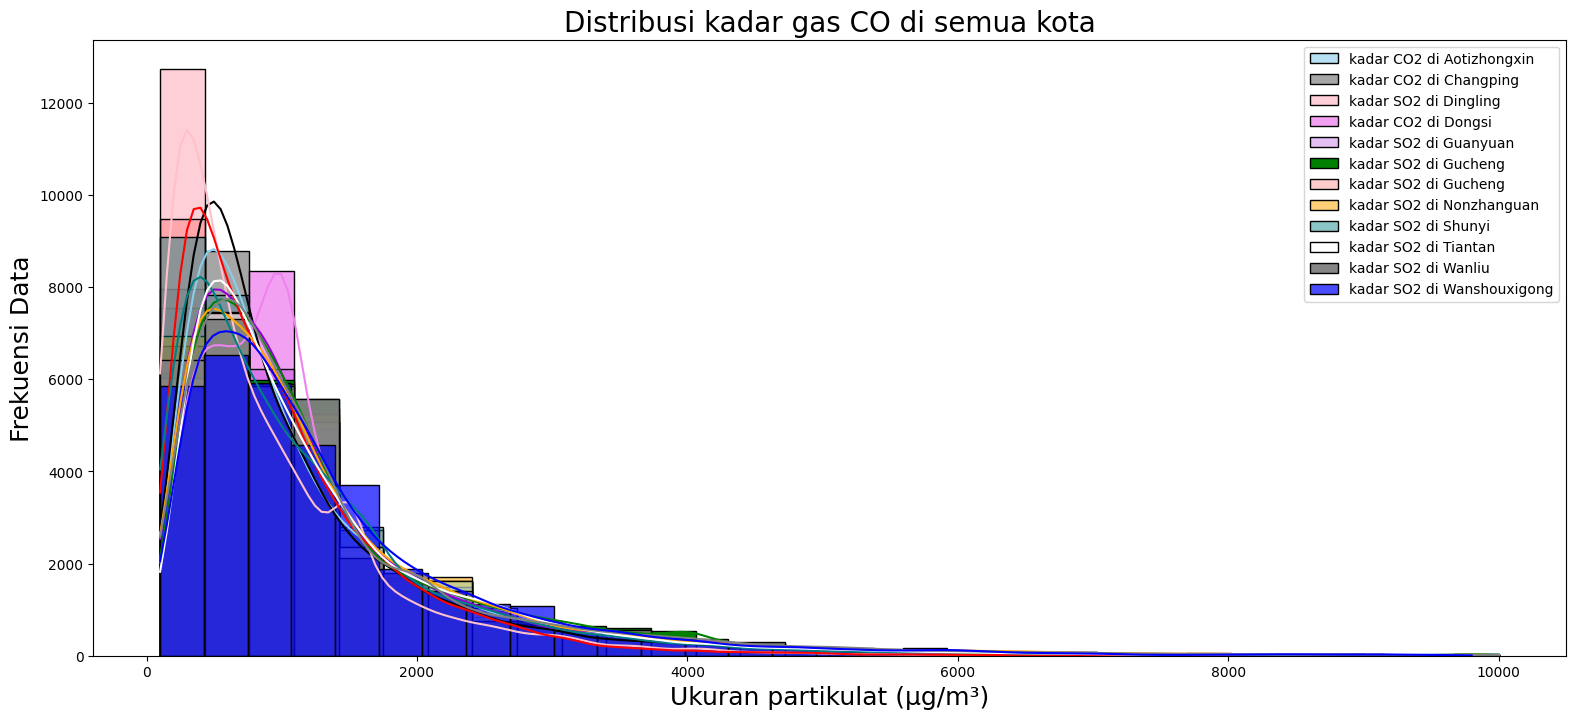

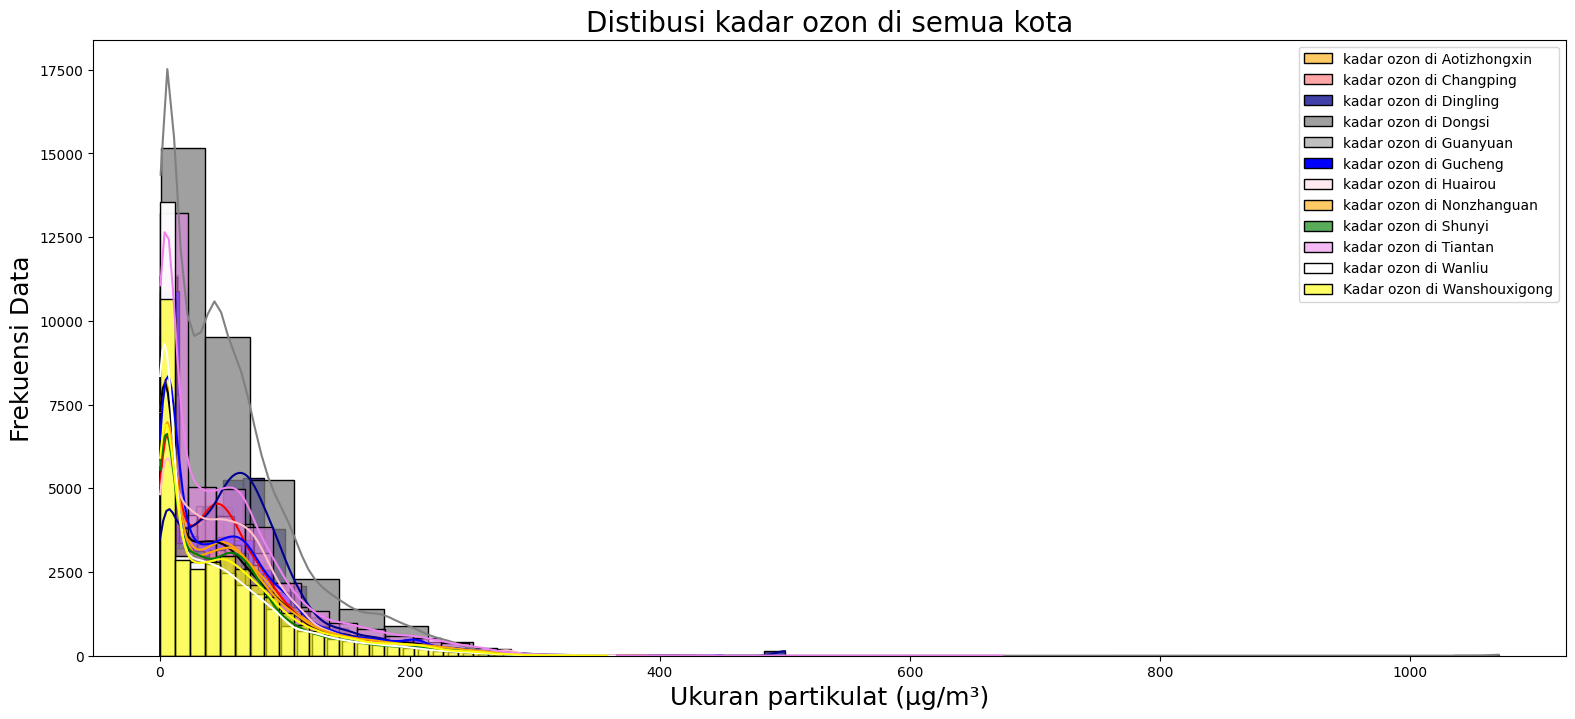

In [20]:
#Bagian pemeriksaan distribusi CO dan O3
# Ukuran grafik pertama
plt.figure(figsize=(19, 8))

# Grafik histograms untuk PM2.5 di semua kota
sns.histplot(dfaotizhongxin['CO'], bins=30, kde=True, color='skyblue', label='kadar CO2 di Aotizhongxin', alpha=0.6)
# Kota Changping
sns.histplot(dfchangping['CO'], bins=30, kde=True, color='black', label='kadar CO2 di Changping', alpha=0.35)
#area Dingling
sns.histplot(dfdingling['CO'], bins=30, kde=True, color='pink', label='kadar SO2 di Dingling', alpha=0.75)
#area Dongsi
sns.histplot(dfdongsi['CO'], bins=30, kde=True, color='violet', label='kadar CO2 di Dongsi', alpha=0.75)
#Area Guanyuan
sns.histplot(dfguanyuan['CO'], bins=30, kde=True, color='darkviolet', label='kadar SO2 di Guanyuan', alpha=0.25)
#Area Guchen
sns.histplot(dfgucheng['CO'], bins=30, kde=True, color='green', label='kadar SO2 di Gucheng', alpha=1.0)
#Area Huatiou
sns.histplot(dfhuairou['CO'], bins=30, kde=True, color='red', label='kadar SO2 di Gucheng', alpha=0.20)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['CO'], bins=30, kde=True, color='orange', label='kadar SO2 di Nonzhanguan', alpha=0.53)
#Area Shunyi
sns.histplot(dfshunyi['CO'], bins=30, kde=True, color='teal', label='kadar SO2 di Shunyi', alpha=0.45)
#Area Tiantan
sns.histplot(dftiantan['CO'], bins=30, kde=True, color='white', label='kadar SO2 di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['CO'], bins=30, kde=True, color='grey', label='kadar SO2 di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['CO'], bins=30, kde=True, color='blue', label='kadar SO2 di Wanshouxigong', alpha=0.70)


# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik kedua
plt.title('Distribusi kadar gas CO di semua kota', fontsize=20)
plt.xlabel('Ukuran partikulat (µg/m³)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)

#Bagian dua untuk pemeriksaan kecundrangan di kadar Ozon
plt.figure(figsize=(19, 8))
#pemeriksan seaborn
sns.histplot(dfaotizhongxin['O3'], bins=30, kde=True, color='orange', label='kadar ozon di Aotizhongxin', alpha=0.6)
#Changping
sns.histplot(dfchangping['O3'], bins=30, kde=True, color='red', label='kadar ozon di Changping', alpha=0.35)
#Dingling
sns.histplot(dfdingling['O3'], bins=30, kde=True, color='darkblue', label='kadar ozon di Dingling', alpha=0.75)
#Dongsi
sns.histplot(dfdongsi['O3'], bins=30, kde=True, color='grey', label='kadar ozon di Dongsi', alpha=0.75)
#Guanyuan
sns.histplot(dfguanyuan['O3'], bins=30, kde=True, color='black', label='kadar ozon di Guanyuan', alpha=0.25)
#Gucheng
sns.histplot(dfgucheng['O3'], bins=30, kde=True, color='blue', label='kadar ozon di Gucheng', alpha=1.0)
#Huairou
sns.histplot(dfhuairou['O3'], bins=30, kde=True, color='pink', label='kadar ozon di Huairou', alpha=0.30)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['O3'], bins=30, kde=True, color='orange', label='kadar ozon di Nonzhanguan', alpha=0.60)
#Area Shunyi
sns.histplot(dfshunyi['O3'], bins=30, kde=True, color='green', label='kadar ozon di Shunyi', alpha=0.65)
#Area Tiantan
sns.histplot(dftiantan['O3'], bins=30, kde=True, color='violet', label='kadar ozon di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['O3'], bins=30, kde=True, color='white', label='kadar ozon di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['O3'], bins=30, kde=True, color='yellow', label='Kadar ozon di Wanshouxigong', alpha=0.60)

# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik
plt.title('Distibusi kadar ozon di semua kota', fontsize=20)
plt.xlabel('Ukuran partikulat (µg/m³)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)


In [ ]:
#Pemeriksaan tempratur, tekanan, dan nilai tekanan poin dew
# Ukuran grafik pertama (suhu)
plt.figure(figsize=(19, 8))

# Grafik histograms untuk PM2.5 di semua kota
sns.histplot(dfaotizhongxin['TEMP'], bins=30, kde=True, color='skyblue', label='nilai suhu di Aotizhongxin', alpha=0.6)
# Kota Changping
sns.histplot(dfchangping['TEMP'], bins=30, kde=True, color='black', label='suhu di Changping', alpha=0.35)
#area Dingling
sns.histplot(dfdingling['TEMP'], bins=30, kde=True, color='pink', label='nilai suhu di Dingling', alpha=0.75)
#area Dongsi
sns.histplot(dfdongsi['TEMP'], bins=30, kde=True, color='violet', label='nilai suhu di Dongsi', alpha=0.75)
#Area Guanyuan
sns.histplot(dfguanyuan['TEMP'], bins=30, kde=True, color='darkviolet', label='nilai suhu di Guanyuan', alpha=0.25)
#Area Guchen
sns.histplot(dfgucheng['TEMP'], bins=30, kde=True, color='green', label='nilai suhu di Gucheng', alpha=1.0)
#Area Huatiou
sns.histplot(dfhuairou['TEMP'], bins=30, kde=True, color='red', label='nilai suhu di Gucheng', alpha=0.20)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['TEMP'], bins=30, kde=True, color='orange', label='nilai suhu di Nonzhanguan', alpha=0.53)
#Area Shunyi
sns.histplot(dfshunyi['TEMP'], bins=30, kde=True, color='teal', label='nilai suhu di Shunyi', alpha=0.45)
#Area Tiantan
sns.histplot(dftiantan['TEMP'], bins=30, kde=True, color='white', label='nilai suhu di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['TEMP'], bins=30, kde=True, color='grey', label='nilai suhu di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['TEMP'], bins=30, kde=True, color='blue', label='nilai suhu di Wanshouxigong', alpha=0.70)


# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik pertama
plt.title('Distribusi nilai suhu di semua kota', fontsize=20)
plt.xlabel('Suhu udara (celsius)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)

#Bagian dua untuk pemeriksaan kecundrangan di ukuran 10M
plt.figure(figsize=(19, 8))
#pemeriksan seaborn
sns.histplot(dfaotizhongxin['PRES'], bins=30, kde=True, color='orange', label='nilai tekanan di Aotizhongxin', alpha=0.6)
#Changping
sns.histplot(dfchangping['PRES'], bins=30, kde=True, color='red', label='nilai tekanan di Changping', alpha=0.35)
#Dingling
sns.histplot(dfdingling['PRES'], bins=30, kde=True, color='darkblue', label='nilai tekanan di Dingling', alpha=0.75)
#Dongsi
sns.histplot(dfdongsi['PRES'], bins=30, kde=True, color='grey', label='nilai tekanan di Dongsi', alpha=0.75)
#Guanyuan
sns.histplot(dfguanyuan['PRES'], bins=30, kde=True, color='black', label='nilai tekanan di Guanyuan', alpha=0.25)
#Gucheng
sns.histplot(dfgucheng['PRES'], bins=30, kde=True, color='blue', label='nilai tekanan di Gucheng', alpha=1.0)
#Huairou
sns.histplot(dfhuairou['PRES'], bins=30, kde=True, color='pink', label='nilai tekanan di Huairou', alpha=0.30)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['PRES'], bins=30, kde=True, color='orange', label='nilai tekanan di Nonzhanguan', alpha=0.60)
#Area Shunyi
sns.histplot(dfshunyi['PRES'], bins=30, kde=True, color='green', label='nilai tekanan di Shunyi', alpha=0.65)
#Area Tiantan
sns.histplot(dftiantan['PRES'], bins=30, kde=True, color='violet', label='nilai tekanan di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['PRES'], bins=30, kde=True, color='white', label='nilai tekanan di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['PRES'], bins=30, kde=True, color='yellow', label='nilai tekanan di Wanshouxigong', alpha=0.60)

# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik
plt.title('Distibusi nilai tekanan semua kota', fontsize=20)
plt.xlabel('Nilai tekanan (Hektopascal)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)

#Kecendrungan di nilai tekanan DEW
# Ukuran grafik pertama (suhu)
plt.figure(figsize=(19, 8))

# Grafik histograms untuk PM2.5 di semua kota
sns.histplot(dfaotizhongxin['DEWP'], bins=30, kde=True, color='skyblue', label='nilai suhu dew di Aotizhongxin', alpha=0.6)
# Kota Changping
sns.histplot(dfchangping['DEWP'], bins=30, kde=True, color='black', label='nilai suhu dew di Changping', alpha=0.35)
#area Dingling
sns.histplot(dfdingling['DEWP'], bins=30, kde=True, color='pink', label='nilai suhu dew di Dingling', alpha=0.75)
#area Dongsi
sns.histplot(dfdongsi['DEWP'], bins=30, kde=True, color='violet', label='nilai suhu dew di Dongsi', alpha=0.75)
#Area Guanyuan
sns.histplot(dfguanyuan['DEWP'], bins=30, kde=True, color='darkviolet', label='nilai suhu dew di Guanyuan', alpha=0.25)
#Area Guchen
sns.histplot(dfgucheng['DEWP'], bins=30, kde=True, color='green', label='nilai suhu dew di Gucheng', alpha=1.0)
#Area Huatiou
sns.histplot(dfhuairou['DEWP'], bins=30, kde=True, color='red', label='nilai suhu dew di Gucheng', alpha=0.20)
#Area Nonzhanguan
sns.histplot(dfnonzhanguan['DEWP'], bins=30, kde=True, color='orange', label='nilai suhu dew di Nonzhanguan', alpha=0.53)
#Area Shunyi
sns.histplot(dfshunyi['DEWP'], bins=30, kde=True, color='teal', label='nilai suhu dew di Shunyi', alpha=0.45)
#Area Tiantan
sns.histplot(dftiantan['DEWP'], bins=30, kde=True, color='white', label='nilai suhu dew di Tiantan', alpha=0.55)
#Area Wanliu
sns.histplot(dfwanliu['DEWP'], bins=30, kde=True, color='grey', label='nilai suhu dew di Wanliu', alpha=0.95)
#Area Wanshouxigong
sns.histplot(dfwanshouxigong['DEWP'], bins=30, kde=True, color='blue', label='nilai suhu dew di Wanshouxigong', alpha=0.70)


# Penambahan legenda
plt.legend(loc='upper right', fontsize='medium')

# Judul grafik kedua
plt.title('Distribusi nilai suhu poin dew di semua kota', fontsize=20)
plt.xlabel('Suhu udara (celsius)', fontsize=18)
plt.ylabel('Frekuensi Data', fontsize=18)


In [ ]:
#kecendrungan di analisis hujan & kecepatan angin


##Pemeriksaan Kecendrungan melalui plot kotak

In [ ]:
#Persiapan kode untuk plot kotak


**Insight:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

**Insight:**
- xxx
- xxx

### Pendalaman Informasi

In [ ]:
# eksplorasi ukuran partikulat



**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
#Tahap awal visualisasi untuk pertanyaan 1


### Pertanyaan 2:

In [ ]:
#Tahap awal visualisasi untuk pertanyaan 1


**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2